In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import pandas as pd
import os
train = pd.read_csv('processed_train.csv') 
test = pd.read_csv('processed_test.csv') 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27390 entries, 0 to 27389
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27390 non-null  object
 1   sentiment  27390 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 428.1+ KB


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
def model_eval(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'Accuracy Score is : {accuracy_score(y_test,y_pred)}')
    print(f'Classification_report')
    print(classification_report(y_test,y_pred))
    print(f'Confusion Matrix')
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

In [4]:
def model_train(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return f1_score(y_test, y_pred, average="weighted")

In [5]:
def tfidf_vectorizer():
    vec=TfidfVectorizer(max_features=10000)
    x_train=vec.fit_transform(train['text']).toarray()
    x_test=vec.transform(test['text']).toarray()
    y_train=train['sentiment']
    y_test=test['sentiment']
    return x_train, y_train, x_test, y_test

def bog_vectorizer():
    vec = CountVectorizer(max_features=10000)
    x_train = vec.fit_transform(train['text']).toarray()
    x_test = vec.transform(test['text']).toarray()
    y_train = train['sentiment']
    y_test = test['sentiment']
    return x_train, y_train, x_test, y_test

def binary_vectorizer():
    vec = CountVectorizer(binary=True, max_features=10000)
    x_train = vec.fit_transform(train['text']).toarray()
    x_test = vec.transform(test['text']).toarray()
    y_train = train['sentiment']
    y_test = test['sentiment']
    return x_train, y_train, x_test, y_test

In [ ]:
best_f1 = 0
metrics = ['euclidean', 'manhattan', 'cosine']
for metric in metrics:
    # TF-IDF Vectorizationbest_model = KMeans(n_clusters=3, random_state=42, algorithm='auto', init='k-means++', n_init=10)
x_train, y_train, x_test, y_test = tfidf_vectorizer()
model_eval(best_model)
    x_train, y_train, x_test, y_test = tfidf_vectorizer()
    kmeans = KMeans(n_clusters=3, random_state=42, algorithm='auto', init='k-means++', n_init=10)
    kmeans.fit(x_train)
    y_pred = kmeans.predict(x_test)
    f1 = f1_score(y_test, y_pred, average="weighted")
    if f1 > best_f1:
        best_f1 = f1
        best_metric = metric
        best_vectorization = 'TF-IDF'
    print(f"f1 score is {f1} with metric={metric}, vectorization=TF-IDF")
    
    # Bag of Words Vectorization    
    x_train, y_train, x_test, y_test = bog_vectorizer()
    kmeans = KMeans(n_clusters=3, random_state=42, algorithm='auto', init='k-means++', n_init=10)
    kmeans.fit(x_train)
    y_pred = kmeans.predict(x_test)
    f1 = f1_score(y_test, y_pred, average="weighted")
    if f1 > best_f1:
        best_f1 = f1
        best_metric = metric
        best_vectorization = 'Bag of Words'
    print(f"f1 score is {f1} with metric={metric}, vectorization=Bag of Words")
    
    # Binary Vectorization
    x_train, y_train, x_test, y_test = binary_vectorizer()
    kmeans = KMeans(n_clusters=3, random_state=42, algorithm='auto', init='k-means++', n_init=10)
    kmeans.fit(x_train)
    y_pred = kmeans.predict(x_test)
    f1 = f1_score(y_test, y_pred, average="weighted")
    if f1 > best_f1:
        best_f1 = f1
        best_metric = metric
        best_vectorization = 'Binary'
    print(f"f1 score is {f1} with metric={metric}, vectorization=Binary")

print(f"Best f1 score is {best_f1} with metric={best_metric}, vectorization={best_vectorization}")


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Accuracy Score is : 0.415506958250497
Classification_report
              precision    recall  f1-score   support

           0       0.12      0.03      0.04      1000
           1       0.42      0.96      0.59      1418
           2       0.83      0.06      0.12      1103

    accuracy                           0.42      3521
   macro avg       0.46      0.35      0.25      3521
weighted avg       0.46      0.42      0.29      3521

Confusion Matrix


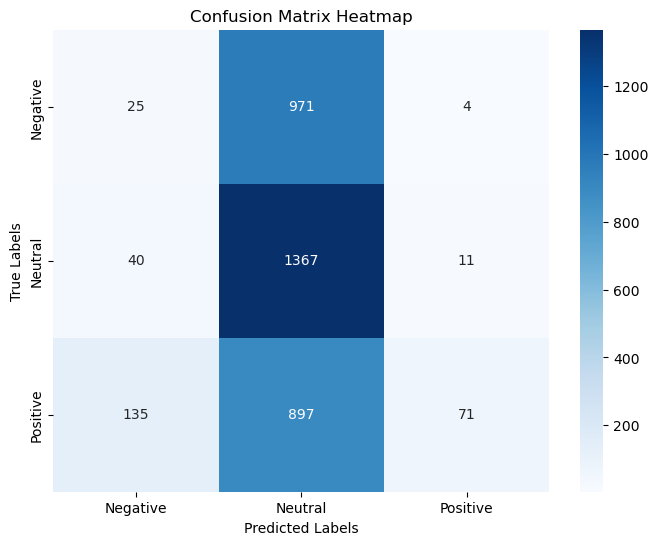

In [7]:
best_model = KMeans(n_clusters=3, random_state=42, algorithm='auto', init='k-means++', n_init=10)
x_train, y_train, x_test, y_test = tfidf_vectorizer()
model_eval(best_model)

In [ ]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import f1_score, pairwise_distances
from sklearn.model_selection import ParameterGrid
import numpy as np

# Sample hyperparameter grid
param_grid = {
    'n_clusters': [3],
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 20, 30, 40, 50],
    'max_iter': [100, 300, 500, 700, 900]
}

metrics = ['euclidean', 'manhattan', 'cosine']
vectorizers = {
    'TF-IDF': tfidf_vectorizer,
    'Bag of Words': bog_vectorizer,
    'Binary': binary_vectorizer
}

best_f1 = 0

for metric in metrics:
    for vec_name, vectorizer in vectorizers.items():
        x_train, y_train, x_test, y_test = vectorizer()
        
        # Use pairwise distance matrix for non-euclidean metrics
        if metric == 'euclidean':
            for params in ParameterGrid(param_grid):
                model = KMeans(**params, random_state=42)
                model.fit(x_train)
                y_pred = model.predict(x_test)
                f1 = f1_score(y_test, y_pred, average='weighted')
                
                if f1 > best_f1:
                    best_f1 = f1
                    best_metric = metric
                    best_vectorization = vec_name
                    best_params = params
                print(f"F1 score={f1:.4f} with metric={metric}, vectorizer={vec_name}, params={params}")
        else:
            # For manhattan & cosine, use KMedoids with precomputed distance
            dist_train = pairwise_distances(x_train, metric=metric)
            dist_test = pairwise_distances(x_test, x_train, metric=metric)

            for params in ParameterGrid(param_grid):
                model = KMedoids(metric='precomputed', n_clusters=params['n_clusters'], init='heuristic', max_iter=params['max_iter'], random_state=42)
                model.fit(dist_train)

                # Map x_test to closest medoid cluster
                y_pred = model.predict(dist_test)
                f1 = f1_score(y_test, y_pred, average='weighted')

                if f1 > best_f1:
                    best_f1 = f1
                    best_metric = metric
                    best_vectorization = vec_name
                    best_params = params
                print(f"F1 score={f1:.4f} with metric={metric}, vectorizer={vec_name}, params={params}")

print(f"\nBest F1 Score = {best_f1:.4f} with metric = {best_metric}, vectorizer = {best_vectorization}, params = {best_params}")


In [10]:
!pip install scikit-learn-extra

     -------------------------------------- 343.0/343.0 kB 1.6 MB/s eta 0:00:00
